# Application: The Capital Asset Pricing Model (CAPM)

CAPM remains one of the workhorse statistical models in finance.  It is so common that sites like Yahoo!Finance report the measures we will estimate statistically.  

I use CAPM for a reason: absent experimental data, it is the only application of the bivariate linear model that I believe has validity in the real world.

The upshot of the CAPM says that we can directly interpret the intercept and slope coefficients as real-world measures relating the excess (or risk-adjusted) returns of a particular stock to those of a basket of stocks, such as a specific market.

## CAPM as a Bivariate Linear Model

Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  

The following equation can be derived:

$E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f)$

Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.

Phrases you may have heard: 

1. The stock's beta is high
2. The hedge fund is chasing alpha

Formally, we can express our conjecture as a joint hypothesis:

$H_0: \alpha = 0, \beta=1$

$H_1: \text{ not }H_0$

Populating the interactive namespace from numpy and matplotlib


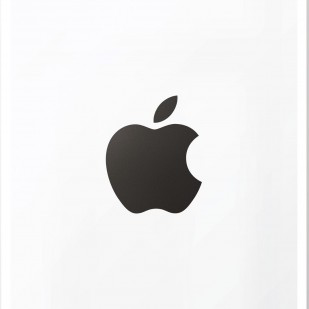

In [1]:
# Everyone's favority stock.

%pylab inline
from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("http://wallpaper.sc/en/iphone6plus/wp-content/uploads/2015/12/iphone6plus-1398x2592-wallpaper_02663-309x309.jpg")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Grab Apple and NASDAQ data.  

start, end = dt.datetime(2006, 1, 1), dt.datetime(2016, 12, 31)
aapl_all = web.DataReader('aapl', 'yahoo', start, end)
nasdaq_all = web.DataReader('^ixic', 'yahoo', start, end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

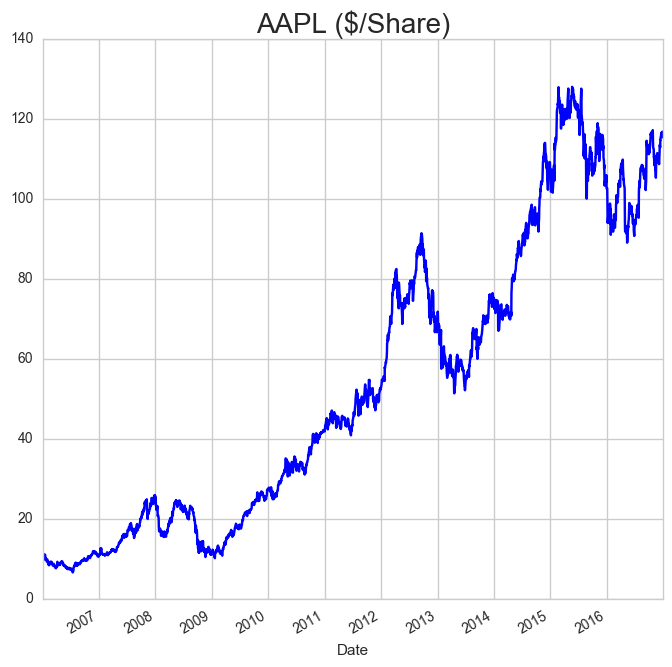

In [4]:
plt.figure(figsize=(8,8))
aapl.plot(color='blue')
plt.title('AAPL ($/Share)', fontsize=20)

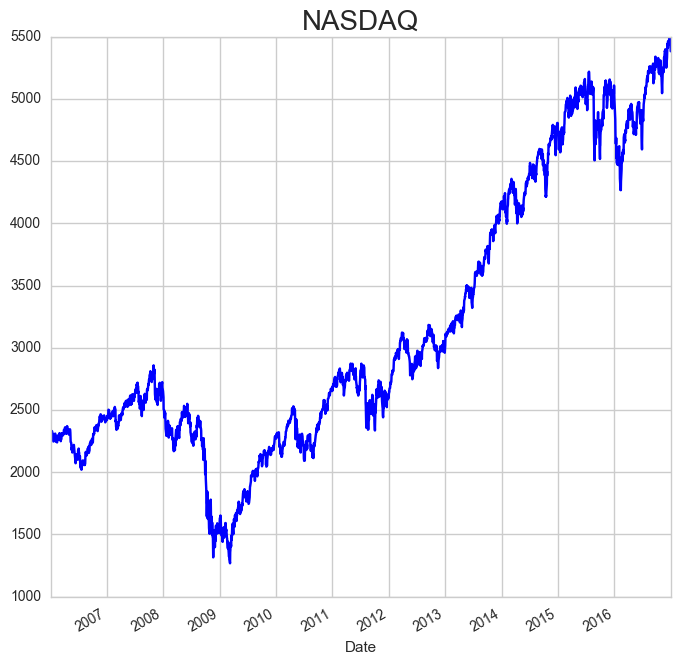

In [5]:
plt.figure(figsize = (8,8))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [6]:
# Calculate log returns, which is the standard finance measure for daily returns in finance.

aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

In [7]:
print(aapl_returns.mean(), aapl_returns.std())

0.0008949336799432093 0.021082455954579644


(0, 60)

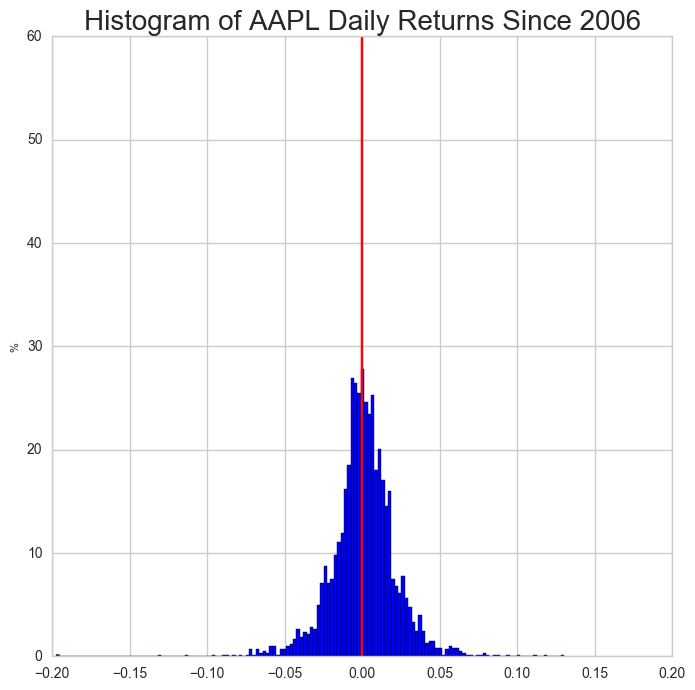

In [8]:
plt.figure(figsize=(8,8))
plt.hist(aapl_returns, bins=150, normed=True, color='blue')
plt.title('Histogram of AAPL Daily Returns Since 2006', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [9]:
print(nasdaq_returns.mean(), nasdaq_returns.std())

0.00031615752944501297 0.013624677755290129


(0, 60)

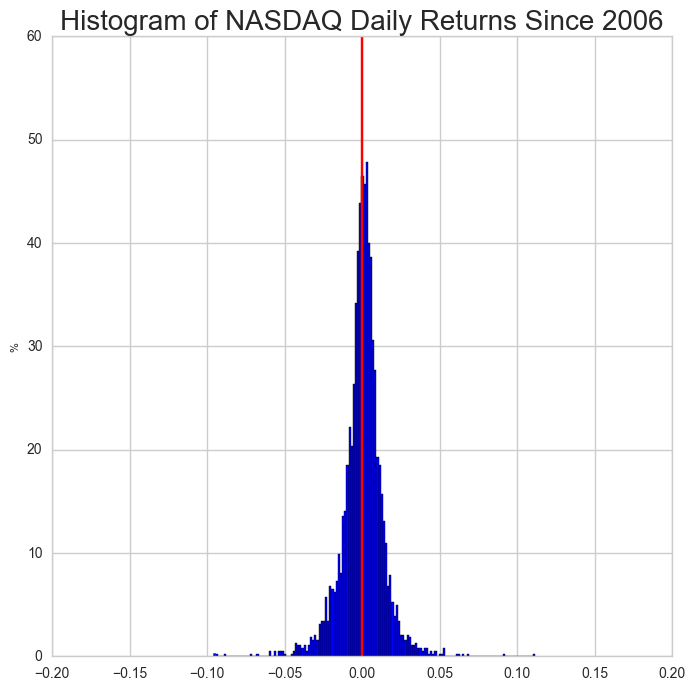

In [10]:
plt.figure(figsize=(8,8))
plt.hist(nasdaq_returns, bins=150, normed=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns Since 2006', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [11]:
# Create dataframes.

aapl_returns = pd.DataFrame(aapl_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

In [12]:
# Confirm dataframes

print(aapl_returns.describe())
print(nasdaq_returns.describe())

         Adj Close
count  2768.000000
mean      0.000895
std       0.021082
min      -0.197470
25%      -0.009041
50%       0.000890
75%       0.011894
max       0.130194
         Adj Close
count  2768.000000
mean      0.000316
std       0.013625
min      -0.095877
25%      -0.005389
50%       0.000925
75%       0.006788
max       0.111594


(-0.1, 0.1)

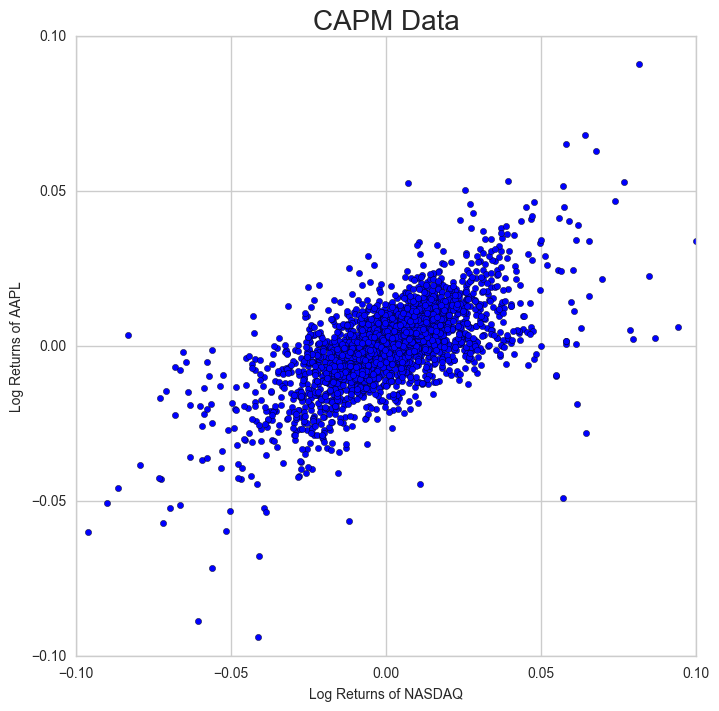

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(aapl_returns, nasdaq_returns)
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of AAPL', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [14]:
# Merge and rename.

aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.head()
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2114.
Date:                Wed, 12 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:05:56   Log-Likelihood:                 7541.1
No. Observations:                2768   AIC:                        -1.508e+04
Df Residuals:                    2766   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.898      0.0

(-0.1, 0.1)

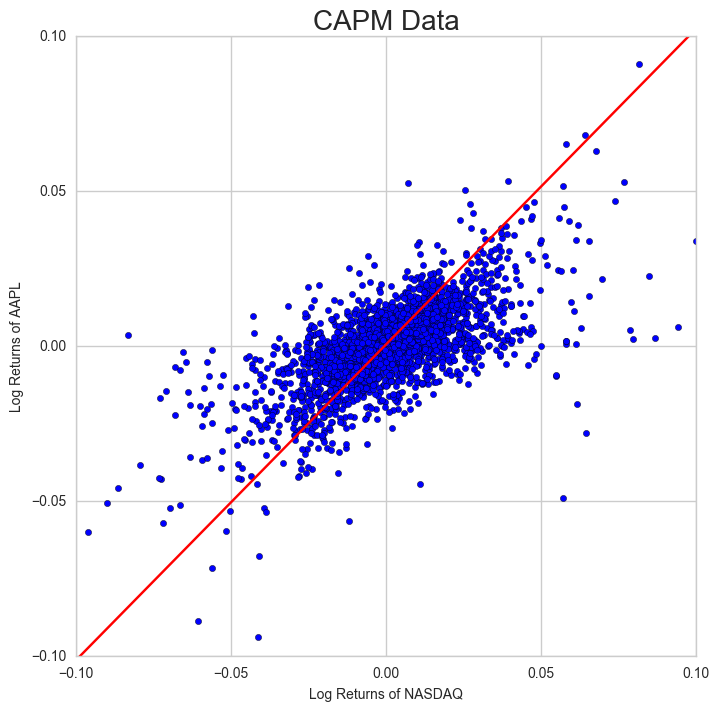

In [15]:
# CAPM data with best linear fit.

figure, ax = plt.subplots(figsize=(8,8))
ax.scatter(aapl_returns, nasdaq_returns)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

In [16]:
# Hypothesis testing.

print(mod.f_test("Intercept = 0"))
print(mod.f_test("nasdaq = 1"))
print(mod.f_test("nasdaq = 1, Intercept = 0"))

<F test: F=array([[ 3.60344759]]), p=0.057763878488353335, df_denom=2766, df_num=1>
<F test: F=array([[ 0.69004266]]), p=0.4062215656784678, df_denom=2766, df_num=1>
<F test: F=array([[ 2.18450896]]), p=0.1127270907717148, df_denom=2766, df_num=2>


## Homework

1. Run the code above.  Congratulations, you've just run your first linear model.  
2. Download IBM stock data for some 10 year period, as well as the index of the market on which it trades.  Graph histograms of the returns, as above, as well as a scatterplot of the daily returns.  Fit the CAPM model to the data and test the relevant hypotheses. 